In [1]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [2]:
import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences)


In [50]:
print(model.wv.most_similar(positive=['yes'], topn=10))

[('sydney', 0.9982026815414429), ('first', 0.9980383515357971), ('about', 0.9980177283287048), ('two', 0.9980082511901855), ('at', 0.9979854822158813), ('yesterday', 0.9979825615882874), ('australian', 0.9979723691940308), ('an', 0.9979722499847412), ('up', 0.9979718327522278), ('from', 0.9979608654975891)]


In [20]:
print(model.wv.doesnt_match(['orange', 'car', 'apple', 'banana', 'tomato', 'car']))

car


In [33]:
pairs = [
    ('car', 'table'),   
    ('car', 'key'),
    ('car', 'the') 
    
]

for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))


'car'	'table'	0.99
'car'	'key'	1.00
'car'	'the'	1.00


In [74]:
vec_king = model.wv['car'][0:20]
vec_king

array([-0.02541555,  0.11548095,  0.06618542,  0.01153771, -0.0216995 ,
       -0.17488171,  0.09586338,  0.24445441, -0.08807449, -0.06304163,
       -0.01766565, -0.1289716 , -0.02969564,  0.04352896,  0.00951654,
       -0.05636295,  0.00632363, -0.03823761, -0.03021255, -0.21041732],
      dtype=float32)

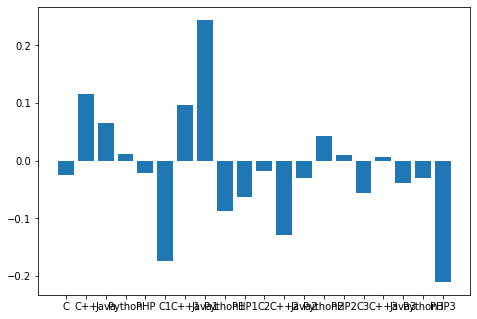

In [75]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP','C1', 'C++1', 'Java1', 'Python1', 'PHP1','C2', 'C++2', 'Java2', 'Python2', 'PHP2','C3', 'C++3', 'Java3', 'Python3', 'PHP3']
students = vec_king
ax.bar(langs,students)
plt.show()